# Exploratory Data Analysis of the Lalonde NSW dataset

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from pyuplift.datasets import load_lalonde_nsw

## Visualization setups

In [3]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15, 5)})

In [4]:
df = load_lalonde_nsw(download_if_missing=True)

In [5]:
df.keys()

dict_keys(['description', 'data', 'feature_names', 'treatment', 'target'])

In [6]:
df['description']

'The dataset contains the treated and control units from the male sub-sample from the National Supported Work Demonstration as used by Lalonde in his paper.'

## Utils

In [7]:
def generate_feature_repr(values):
    feature_names = list(set(values))
    feature_names.sort()
    feature_values = []
    for feature_name in feature_names:
        value = values[values == feature_name].shape[0]
        feature_values.append(value)
    feature_names = list(map(lambda x: int(x), feature_names))
    return pd.DataFrame(data={
        'Name': feature_names,
        'Value': feature_values
    })

## Inspect the treatment variable

In [8]:
df['treatment'][:20]

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [9]:
df_repr = generate_feature_repr(df['treatment'])
df_repr['Name'] = df_repr['Name'].apply(lambda x: 'Treatment' if x else 'Control')

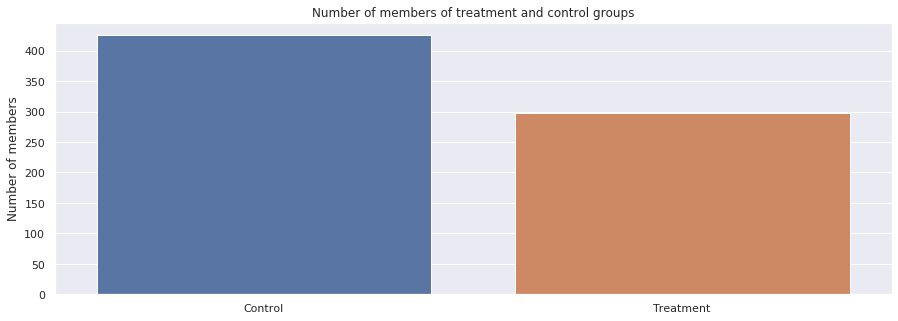

In [10]:
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(
    xlabel='',
    ylabel='Number of members', 
    title='Number of members of treatment and control groups'
);

## Inspect the target variable

In [11]:
df['target'][:10]

array([    0.    ,     0.    ,     0.    ,   796.5597,  8124.715 ,
        4813.05  ,  8048.603 , 29408.04  ,  2877.682 , 10864.88  ])

In [12]:
target = df['target'] 
non_zero = df['target'][target != 0].shape[0]
print("{}% - non zero values". format(100 * non_zero // target.shape[0]))

72% - non zero values


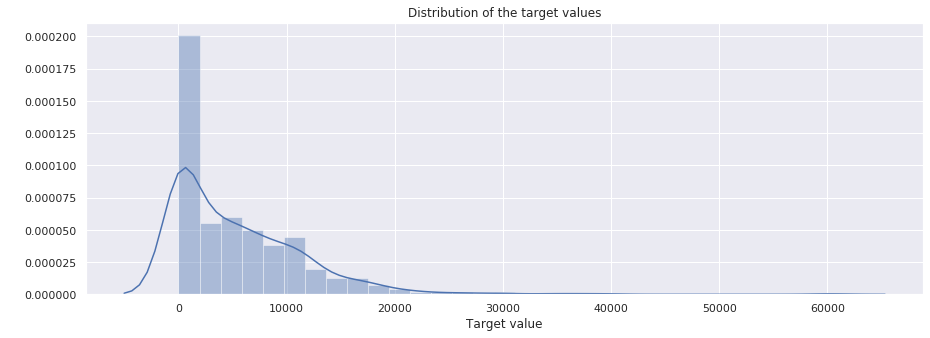

In [13]:
ax = sns.distplot(df['target'])
ax.set(
    xlabel='Target value', 
    ylabel=' ', 
    title="Distribution of the target values"
);

## Inspect features

In [14]:
df_features = pd.DataFrame(data=df['data'], columns=df['feature_names'])

In [15]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 7 columns):
age        722 non-null float64
educ       722 non-null float64
black      722 non-null float64
hisp       722 non-null float64
married    722 non-null float64
nodegr     722 non-null float64
re75       722 non-null float64
dtypes: float64(7)
memory usage: 39.6 KB


In [16]:
df_features.head()

,age,educ,black,hisp,married,nodegr,re75
0,31.0,10.0,1.0,0.0,0.0,1.0,0.0000
1,21.0,7.0,0.0,1.0,0.0,1.0,0.0000
2,23.0,7.0,0.0,0.0,0.0,1.0,0.0000
3,23.0,12.0,0.0,0.0,0.0,0.0,3903.1950
4,19.0,10.0,1.0,0.0,0.0,1.0,385.2741


### Features description
* age - age in years.  
* educ - years of schooling.  
* black - indicator variable for blacks.  
* hisp - indicator variable for Hispanics.  
* married - indicator variable for marital| status.  
* nodegr - indicator variable for high school diploma.  
* re75 - real earnings in 1975.  

### Feature: age
How old responder are?

In [17]:
df_repr = generate_feature_repr(df_features['age'].values)

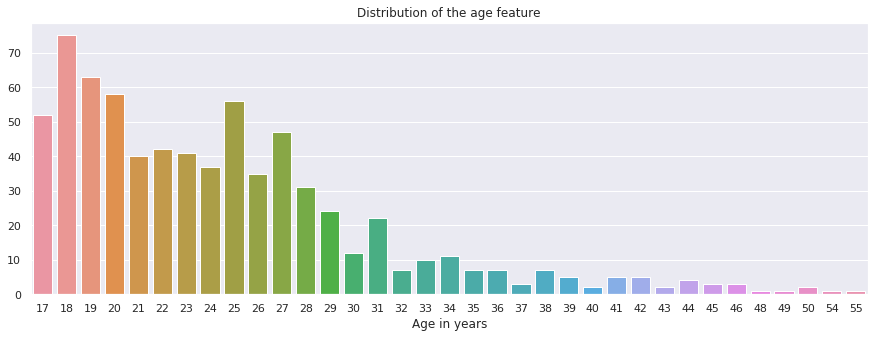

In [18]:
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(
    xlabel='Age in years',
    ylabel='', 
    title='Distribution of the age feature'
);

### Feature: educ
How much years of schooling does responder has?

In [19]:
df_repr = generate_feature_repr(df_features['educ'].values)

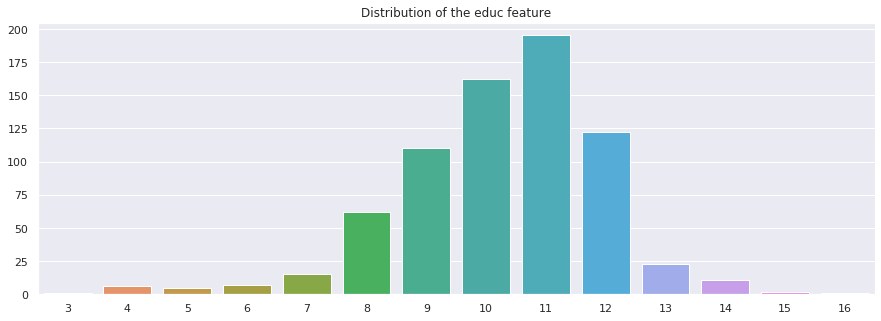

In [20]:
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(
    xlabel='',
    ylabel='', 
    title='Distribution of the educ feature'
);

### Feature: black
Does responder belongs to the Blacks?

In [21]:
df_repr = generate_feature_repr(df_features['black'].values)
df_repr['Name'] = df_repr['Name'].apply(lambda x: 'Blacks' if x else 'Not Blacks')

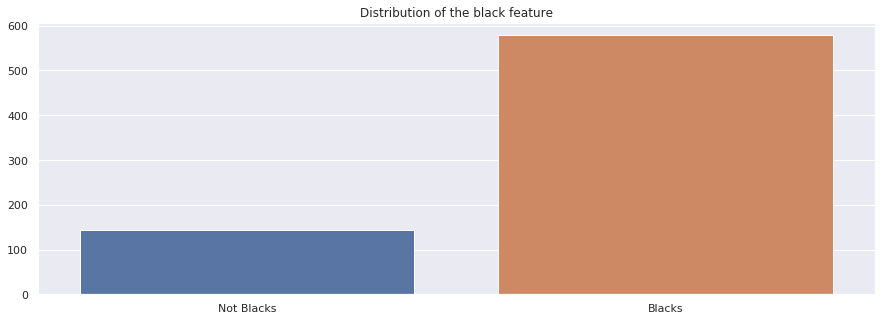

In [22]:
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(
    xlabel='',
    ylabel='', 
    title='Distribution of the black feature'
);

### Feature: hisp
Does responder belongs to the Hispanics?

In [23]:
df_repr = generate_feature_repr(df_features['hisp'].values)
df_repr['Name'] = df_repr['Name'].apply(lambda x: 'Hispanics' if x else 'Not hispanics')

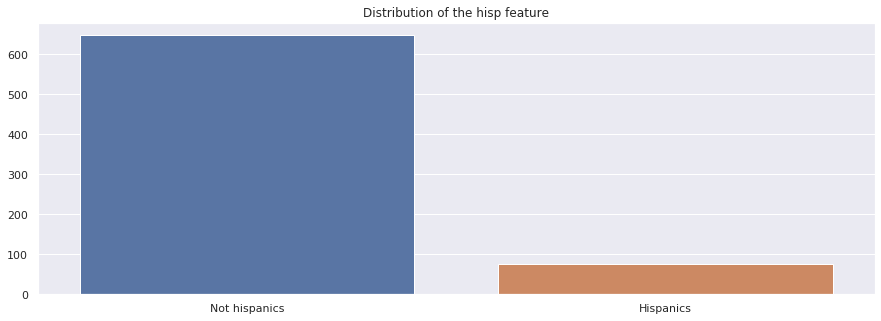

In [24]:
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(
    xlabel='',
    ylabel='', 
    title='Distribution of the hisp feature'
);

### Feature: married
What's the marital status of the responder?

In [25]:
df_repr = generate_feature_repr(df_features['married'].values)
df_repr['Name'] = df_repr['Name'].apply(lambda x: 'Married' if x else 'Not married')

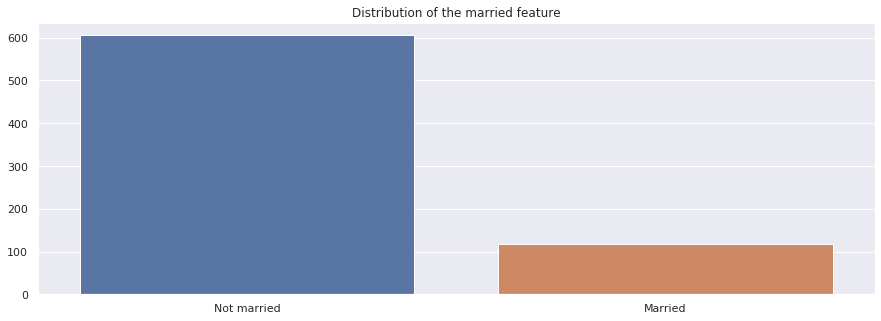

In [26]:
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(
    xlabel='',
    ylabel='', 
    title='Distribution of the married feature'
);

### Feature: nodegr
Does responder have a high school diploma?

In [27]:
df_repr = generate_feature_repr(df_features['nodegr'].values)
df_repr['Name'] = df_repr['Name'].apply(lambda x: 'Diploma' if x else 'No diploma')

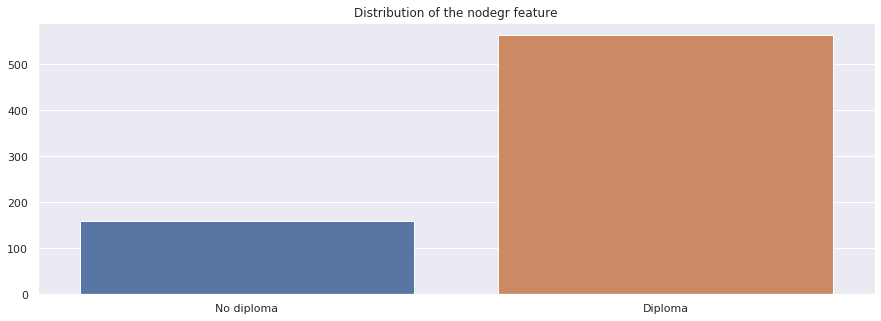

In [28]:
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(
    xlabel='',
    ylabel='', 
    title='Distribution of the nodegr feature'
);

### Feature: re75
What's real earnings in 1975 of the responder?

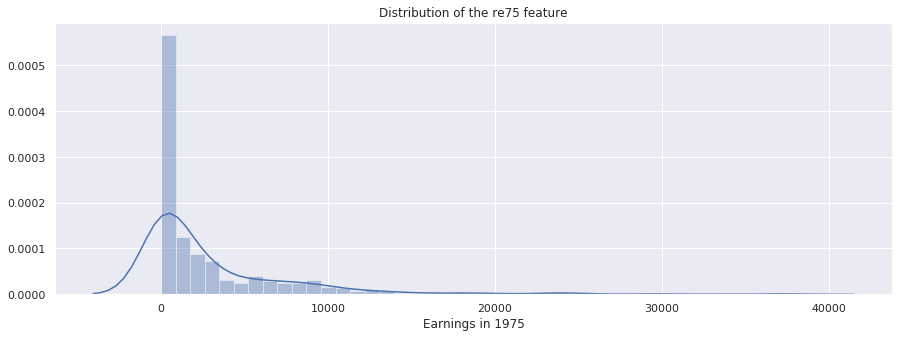

In [29]:
ax = sns.distplot(df_features['re75'])
ax.set(
    xlabel='Earnings in 1975', 
    ylabel='',
    title="Distribution of the re75 feature"
);

In [30]:
zeros = 100 * df_features[df_features['re75'] == 0].shape[0] // df_features.shape[0]
print(f"{zeros}% of zero values")

40% of zero values
